<a href="https://colab.research.google.com/github/Nayeong127/class2021Spring/blob/main/0510%20sound%20%EA%B3%B5%EB%B6%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import IPython.display as ipd
import numpy as np
from scipy.signal import lfilter

# Phasor

In [ ]:
# parameter setting
amp = 1          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz
dur = 0.5        # in seconds
freq = 100.0     # sine frequency, Hz

In [ ]:
# generate time
t = np.arange(1, sr * dur+1)/sr

In [ ]:
# generate phase
theta = t * 2*np.pi * freq   

In [ ]:
# generate signal by cosine-phasor
s = amp * np.sin(theta)

Text(0, 0.5, 'real')

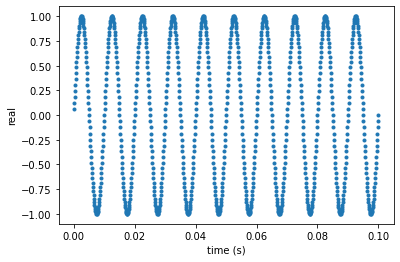

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

In [ ]:
ipd.Audio(s, rate=sr)

In [ ]:
# generate signal by complex-phasor
c = amp * np.exp(theta*1j)

Text(0.5, 0, 'imag')

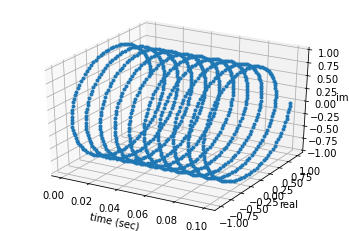

In [ ]:
fig = plt.figure()
ax = plt.subplot(111, projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.')
ax.set_xlabel('time (sec)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

In [ ]:
import plotly.graph_objects as go
import numpy as np

x, y, z = t[0:200], c.real[0:200], c.imag[0:200]
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
                                   mode='markers',
                                   marker=dict(size=3))])
fig.update_layout(scene = dict(
                    xaxis_title='time (sec)',
                    yaxis_title='real',
                    zaxis_title='imag'))
fig.show()

In [ ]:
ipd.Audio(c.imag, rate=sr)

In [2]:
def phasor_sine(amp, sr, dur, freq):

  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq   
  s = amp * np.sin(theta)

  return s, t, theta

In [ ]:
amp = 1; sr = 10000; dur = 1; freq = 440
s, t, theta = phasor_sine(amp, sr, dur, freq)
ipd.Audio(s, rate=sr)

In [3]:
def phasor_complex(amp, sr, dur, freq):

  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq   
  c = amp * np.exp(theta*1j)

  return c, t, theta

In [ ]:
amp = 1; sr = 10000; dur = 1; freq = 300.0
c, t, theta = phasor_complex(amp, sr, dur, freq)
ipd.Audio(c.imag, rate=sr)

# Generate pulse train (=source)

f0 가 100이면 200300~ 배음 만들어져
그것의 합이 성대에서 나는 pulse train!
sr과 관련이 있어~

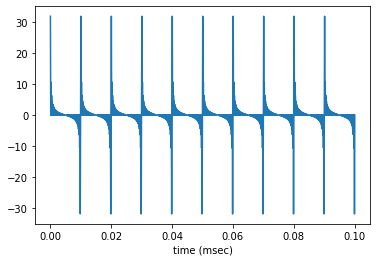

In [6]:
# parameter setting
amp = 1
sr = 10000
dur = 0.5

F0 = 100
Fend = int(sr/2)  #Nyquist frequency- 표현할 수 있는 주파수가 sr의 반까지임./ 공돌이의 수학정리노트에서 보셈

s_all = 0       #for loop 잘 보렴
for freq in range(F0, Fend+1, F0): #5000까지만 됨.-> 100부터 200,300.... ->(100,5001, by 100)
  s, t, theta = phasor_sine(amp, sr, dur, freq)
  s_all += s

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s_all[0:1000]); 
ax.set_xlabel('time (msec)')
ipd.Audio(s_all, rate=sr)

#지저분하긴 해도 pulse처럼 보이긴 함.

공돌이의 수학정리노트

* 시간 샘플링과 나이퀴스트 이론
* 마우스 움직여서 점이 더 많이 생기면 sr 높은겨

최소한의 표현을 하려면 sr이 너무 적으면 안 돼.
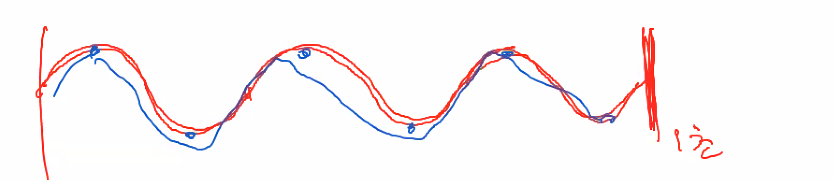

그래도 두 배는 되어야 sr이 되어야 함.

# Filter source

pulse train=harmonics=source

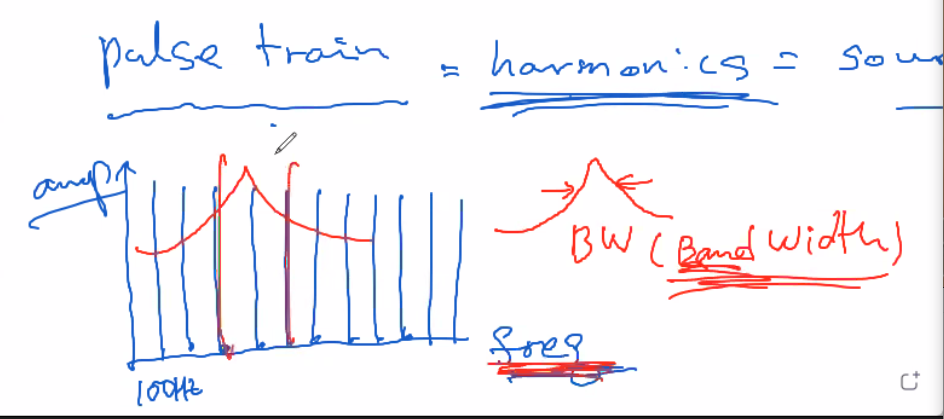
band width가 크면 산맥이 좀 둔하고 작으면 뾰족!

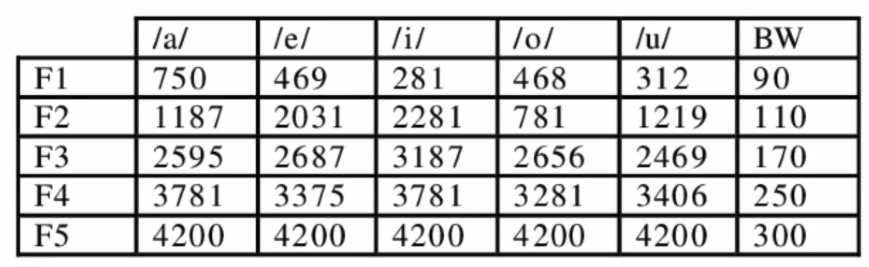

In [4]:
def hz2w(F, sr): #Herz to omega라고 읽어
    NyFreq = sr/2;
    w = F/NyFreq *np.pi;
    return w

def resonance (srate, F, BW):
    a2 = np.exp(-hz2w(BW,srate))
    omega = F*2*np.pi/srate
    a1 = -2*np.sqrt(a2)*np.cos(omega)
    a = np.array([1, a1, a2])
    b = np.array([sum(a)])
    return a, b

#이건 안 가르칠 겁니다~ 필터 만드는 데 쓸거임!

In [7]:
s = s_all

아 모음인데, 하나씩 f0 f1 f2 f3 f4임/ f5안 함

In [9]:
RG = 0  # RG is the frequency of the Glottal Resonator 산맥의 위치 느낌// 근데 산맥을 0으로 한다면 0에서 뾰족!
BWG = 100  # BWG is the bandwidth of the Glottal Resonator 얘만큼의 band width
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

#무슨 모음인지는 모르겠지만 진짜 성대에서 나는 느낌임!
#gradually 줄어듦

In [10]:
RG = 750  # RG is the frequency of the 1st Formant
BWG = 90  # BWG is the bandwidth of the 1st Formant
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [11]:
RG = 1187  # RG is the frequency of the 2nd Formant
BWG = 110  # BWG is the bandwidth of the 2nd Formant
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
RG = 2595  # RG is the frequency of the 3rd Formant
BWG = 170  # BWG is the bandwidth of the 3rd Formant
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [12]:
RG = 3781  # RG is the frequency of the 4th Formant
BWG = 250  # BWG is the bandwidth of the 4th Formant
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [15]:
#입술 구현
s = lfilter(np.array([1, -1]), np.array([1]), s)
ipd.Audio(s, rate=sr)
#브래슨, 트럼본 같은 거 앞 부분이 나팔 느낌임/.관악기는 모두 입술 느낌으로 생김-> radition 효과/증폭 효과

숙제) 20210510.wavfh 원하는 모음 고

# load wav

In [ ]:
from scipy.io import wavfile
# sr, s = wavfile.read('a.wav')
nSamp = len(s)
dur = nSamp / sr
t = np.linspace(1/sr, dur, nSamp)

# Fourier tranform

In [ ]:
nFFT = nSamp
amp = [];
for n in range(0,nFFT):
    omega = 2*np.pi*n/nFFT # angular velocity
    z = np.exp(omega*1j)**(np.arange(0,nSamp))
    amp.append(np.abs(np.dot(s,z)))

<IPython.core.display.Javascript object>


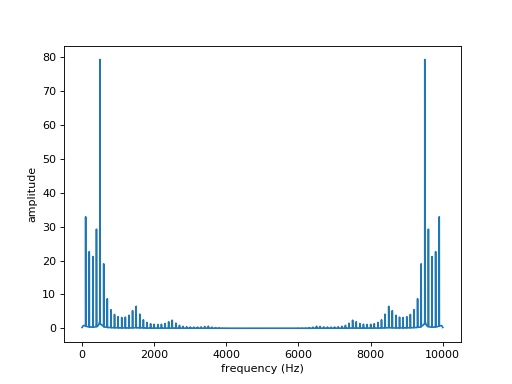

Text(0, 0.5, 'amplitude')

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
freq = np.arange(1,nFFT+1)*sr/nFFT;
ax.plot(freq, amp)
ax.set_xlabel('frequency (Hz)')
ax.set_ylabel('amplitude')

# define helper functions

In [ ]:
def frame_signal(signal, srate, win_size, win_step):
    frame_size = int(win_size * srate)
    frame_step = int(win_step * srate)

    # Get number of frames
    num_frames = int(np.ceil(np.abs(len(signal) - frame_size) / frame_step))
    # Pad signal
    pad_len = num_frames * frame_step + frame_size
    pad = np.zeros((pad_len - len(signal)))
    signal_padded = np.append(signal, pad)
    # Get within-frame sample indices
    idx1 = np.tile(np.arange(0, frame_size), (num_frames, 1))
    # Get vectors of frame_step increments
    idx2 = np.tile(np.arange(0, num_frames * frame_step, frame_step),
                   (frame_size, 1)).T
    # Get total indices divided by each frame
    indices = idx1 + idx2
    # Get frames divided by each frame based on indices
    frames = signal_padded[indices.astype(np.int32, copy=False)]
#     if cutoff is not None:
#         cutoff_bin = round(cutoff * nfft / (srate))  # hz -> bin
#         frames = frames[:, :cutoff_bin]
    return frames

def get_window(win_size, srate, win_type, win_samp=None):
    '''Get window samples for win_size'''
    if win_samp is None:
        win_samp = int(win_size * srate)  # sec -> sample

    if win_type == 'rect':
        return np.kaiser(win_samp, 0)
    elif win_type == 'hamming':
        return np.hamming(win_samp)
    elif win_type == 'hanning':
        return np.hanning(win_samp)
    elif win_type == 'kaiser':
        return np.kaiser(win_samp, 14)
    elif win_type == 'blackman':
        return np.blackman(win_samp)

def plot_spectrogram(S):
    fig, ax = plt.subplots(facecolor='white', figsize=(14, 6))
    im = ax.imshow(S.T, aspect='auto', origin='lower', cmap=plt.get_cmap('Greys'))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im, cax=cax)
    return fig, ax

def preemphasis(s, pre_emp=0.97):
    # Emphasize high frequency range of the waveform by increasing power(squared amplitude).
    s = lfilter([1, -pre_emp], [1], s)
    return s

# preprocessing signal

In [ ]:
max_freq = None  # cutoff freq
win_size = 0.008 # sec
win_step = 0.001  # sec
win_type = 'hanning' # options: 'rect', 'hamming', 'hanning', 'kaiser', 'blackman'
nfft = 1024

# Emphasize signal
s = preemphasis(s)
# Frame signal
frames = frame_signal(s, sr, win_size, win_step)
# Apply window function
frames *= get_window(win_size, sr, win_type)
print('frames:', frames.shape)

frames: (492, 80)


(<Figure size 1008x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c2140e358>)

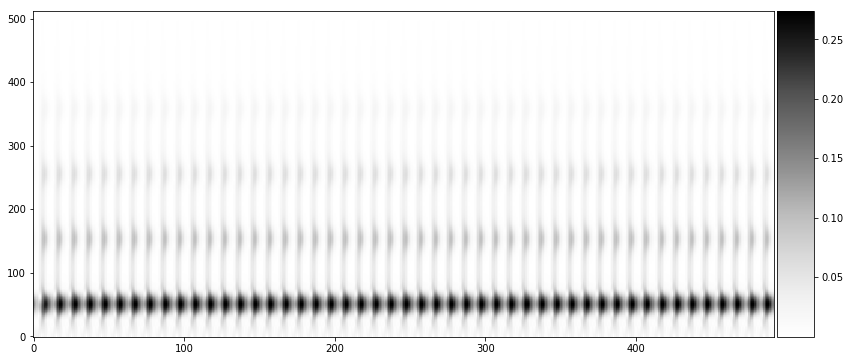

In [ ]:
magspec = np.abs(np.fft.rfft(frames, n=nfft)) # frames x (nfft//2 + 1)
plot_spectrogram(magspec)

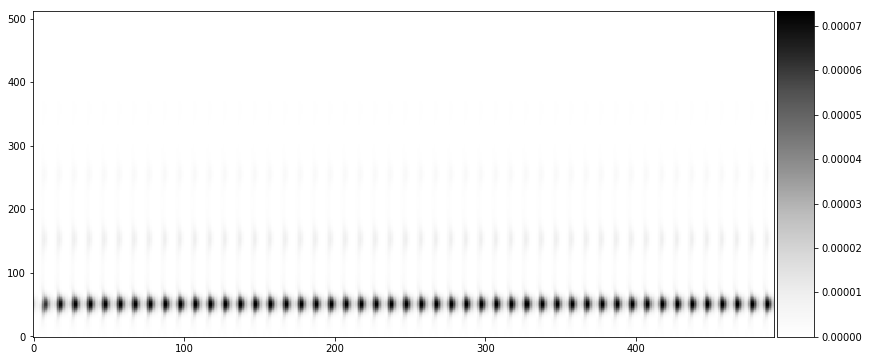

In [ ]:
powspec = 1/nfft * (magspec**2)
plot_spectrogram(powspec);

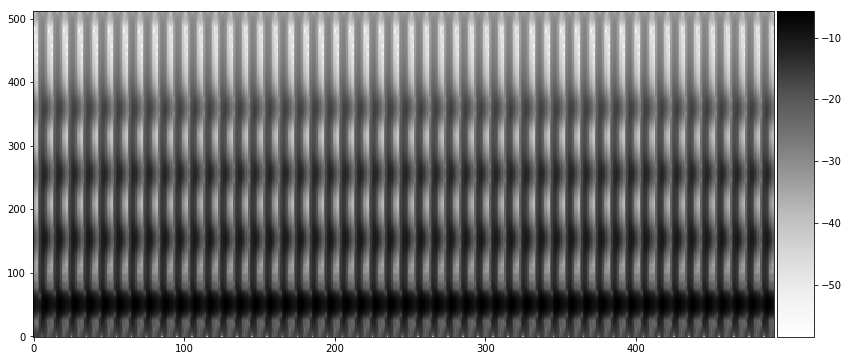

In [ ]:
logspec = 10 * np.log10(magspec) # dB scale
plot_spectrogram(logspec);

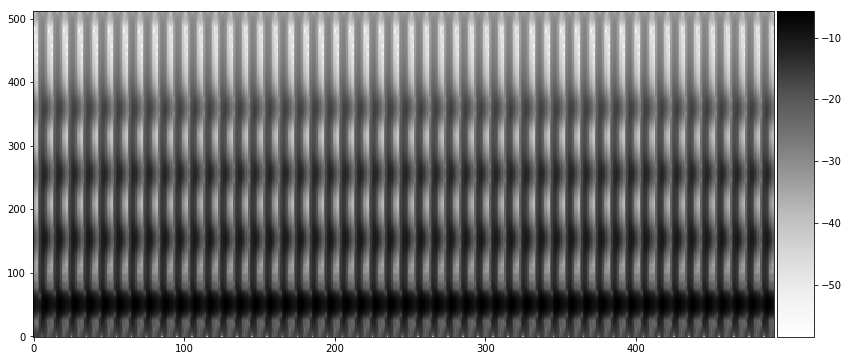

In [ ]:
logspec = 10 * np.log10(magspec) # dB scale
plot_spectrogram(logspec);